In [1]:
import pandas as pd

In [2]:
df_train = pd.read_json('train.json', orient='columns')
df_test = pd.read_json('test.json', orient='columns')

In [3]:
#df_test

In [4]:
df_train.head()

,cuisine,id,ingredients
0,italian,0,"[penne, shallots, rice vinegar, fresh basil, g..."
1,greek,1,"[sugar, chopped walnuts, filo dough, chopped a..."
2,italian,2,"[fresh rosemary, chopped fresh thyme, fresh or..."
3,southern_us,3,"[sugar, hot sauce, ramps, vinegar, cream chees..."
4,french,4,"[ground cinnamon, panettone, whipped cream, Am..."


In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

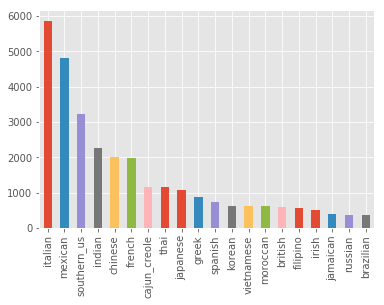

In [7]:
df_train['cuisine'].value_counts().plot(kind='bar')

In [8]:
from collections import Counter

In [9]:
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [10]:
counters['italian'].most_common(10)

[('salt', 2575),
 ('olive oil', 2306),
 ('garlic cloves', 1204),
 ('grated parmesan cheese', 1176),
 ('garlic', 1100),
 ('ground black pepper', 1052),
 ('extra-virgin olive oil', 1044),
 ('onions', 921),
 ('water', 798),
 ('butter', 772)]

In [11]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
greek,salt,olive oil,dried oregano,feta cheese crumbles,garlic cloves,fresh lemon juice,garlic,ground black pepper,extra-virgin olive oil,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
french,salt,sugar,all-purpose flour,unsalted butter,butter,olive oil,large eggs,water,garlic cloves,ground black pepper
mexican,salt,onions,garlic,ground cumin,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
moroccan,olive oil,salt,ground cumin,onions,ground cinnamon,garlic cloves,ground ginger,water,carrots,paprika
russian,salt,sugar,onions,all-purpose flour,sour cream,eggs,water,butter,unsalted butter,large eggs
indian,salt,onions,garam masala,water,ground turmeric,garlic,ground cumin,cumin seed,vegetable oil,oil
japanese,soy sauce,salt,sugar,mirin,water,sake,rice vinegar,vegetable oil,scallions,sesame oil
vietnamese,fish sauce,sugar,salt,garlic,water,carrots,soy sauce,garlic cloves,vegetable oil,shallots


In [12]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

In [13]:
df_train.head()

,cuisine,id,ingredients,all_ingredients
0,italian,0,"[penne, shallots, rice vinegar, fresh basil, g...",penne;shallots;rice vinegar;fresh basil;ground...
1,greek,1,"[sugar, chopped walnuts, filo dough, chopped a...",sugar;chopped walnuts;filo dough;chopped almon...
2,italian,2,"[fresh rosemary, chopped fresh thyme, fresh or...",fresh rosemary;chopped fresh thyme;fresh orega...
3,southern_us,3,"[sugar, hot sauce, ramps, vinegar, cream chees...",sugar;hot sauce;ramps;vinegar;cream cheese;gro...
4,french,4,"[ground cinnamon, panettone, whipped cream, Am...",ground cinnamon;panettone;whipped cream;Amaren...


In [14]:
df_train['all_ingredients'].str.contains('garlic cloves')

0         True
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20        True
21       False
22       False
23       False
24       False
25       False
26        True
27       False
28       False
29       False
         ...  
29744    False
29745    False
29746    False
29747    False
29748    False
29749    False
29750    False
29751     True
29752     True
29753    False
29754     True
29755    False
29756    False
29757    False
29758    False
29759    False
29760    False
29761    False
29762     True
29763    False
29764     True
29765    False
29766    False
29767    False
29768    False
29769    False
29770    False
29771    False
29772    False
29773    False
Name: all_ingredients, Length: 29774, dtype: bool

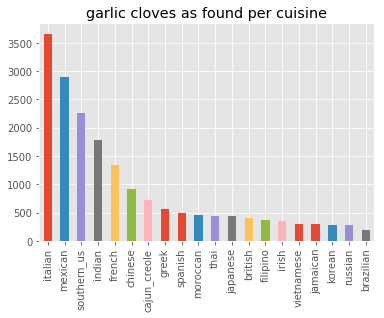

In [15]:
indices = df_train['all_ingredients'].str.contains('salt')
df_train[indices]['cuisine'].value_counts().plot(kind='bar', title='garlic cloves as found per cuisine')

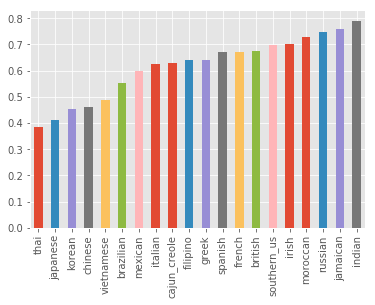

In [16]:
relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='bar')

In [17]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'garam masala', 'garlic', 'garlic cloves',
       'grated parmesan cheese', 'green bell pepper', 'green onions',
       'ground allspice', 'ground black pepper', 'ground cinnamon',
       'ground cumin', 'ground ginger', 'ground turmeric',
       'jalapeno chilies', 'large eggs', 'lime', 'milk', 'mirin', 'oil',
       'olive oil', 'onions', 'paprika', 'pepper', 'potatoes',
       'red bell pepper', 'rice vinegar', 'sake', 'salt', 'scallions',
       'sesame oil', 'sesame seeds', 'shallots', 'sour cream',
       'soy sauce', 'sugar', 'tomatoes', 'unsalted butter',
       'vegeta

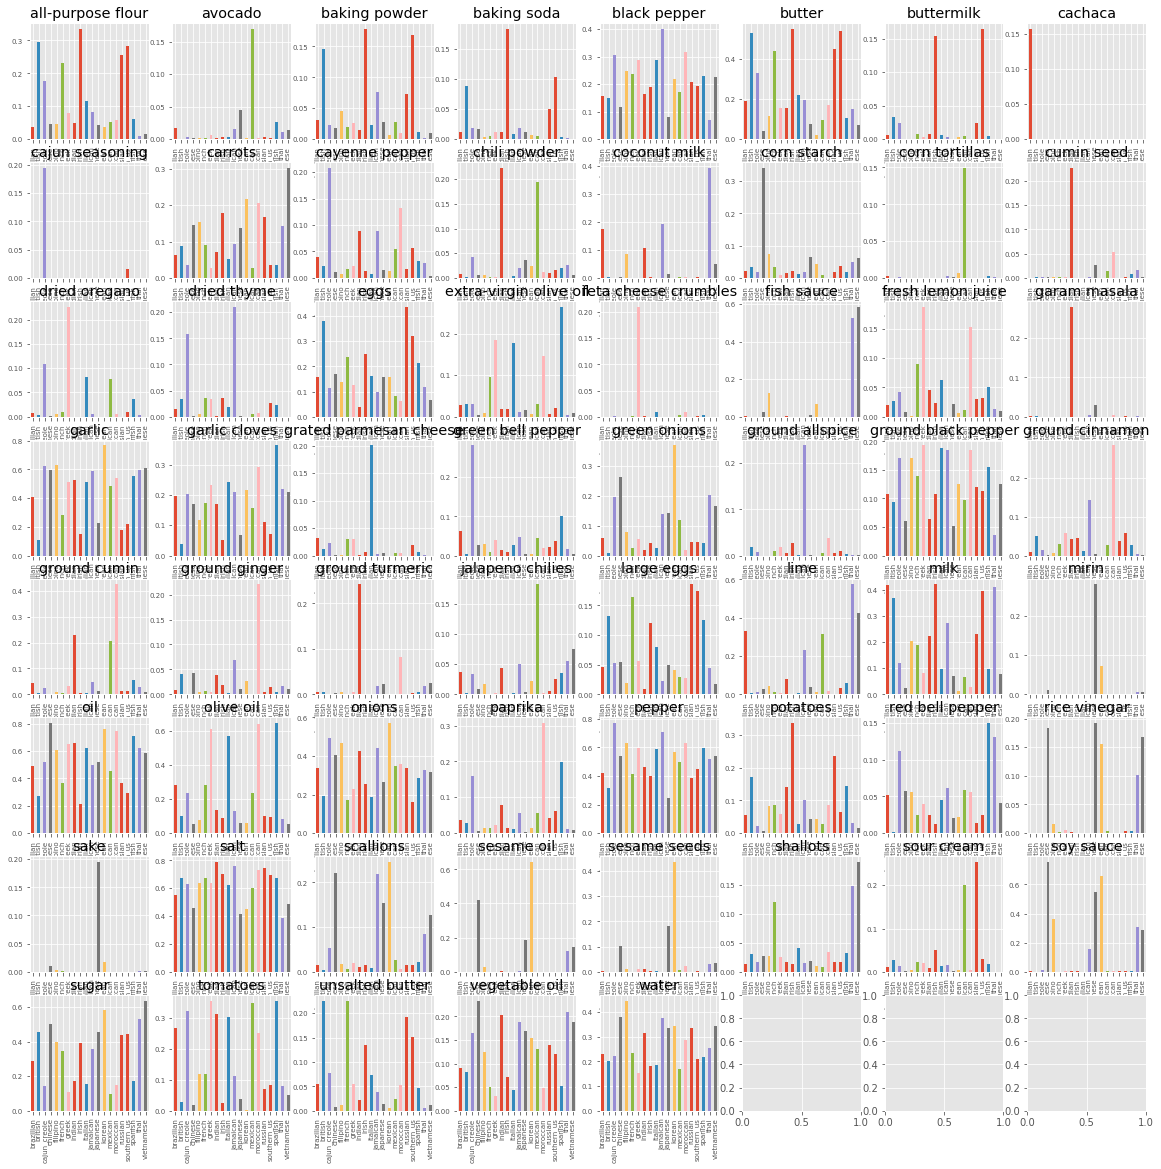

In [18]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

In [19]:
train_ingredients_text = df_train.ingredients.apply(lambda s: ' '.join(w.lower() for w in s)).str.replace('[^\w\s]','')
test_ingredients_text = df_test.ingredients.apply(lambda s: ' '.join(w.lower() for w in s)).str.replace('[^\w\s]','')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [21]:
lb = LabelEncoder()
train_y = lb.fit_transform(df_train.cuisine)

In [22]:
clf = RandomForestClassifier(max_features="sqrt", n_estimators=500, n_jobs=2, random_state=0)
vectorizer = TfidfVectorizer(norm='l2',use_idf=True)
train_x = vectorizer.fit_transform(train_ingredients_text)
test_x = vectorizer.transform(test_ingredients_text)

In [23]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
pred_y = clf.predict(test_x)

In [25]:
test_id = [test_id for test_id in df_test.id]
sub = pd.DataFrame({'id': test_id, 'cuisine': lb.inverse_transform(pred_y)}, columns=['id', 'cuisine'])
sub.to_csv('predicitions.csv', index=False)

C:\Users\neelp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
